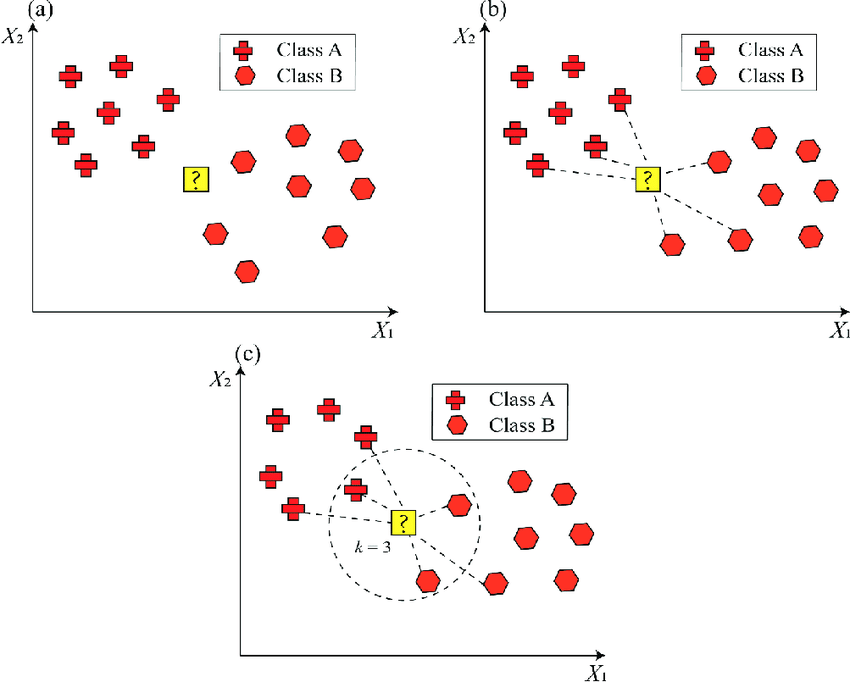

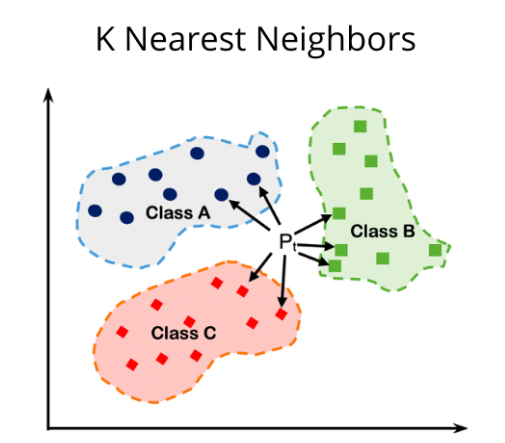

In [43]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv(r"C:/Users/My/Downloads/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

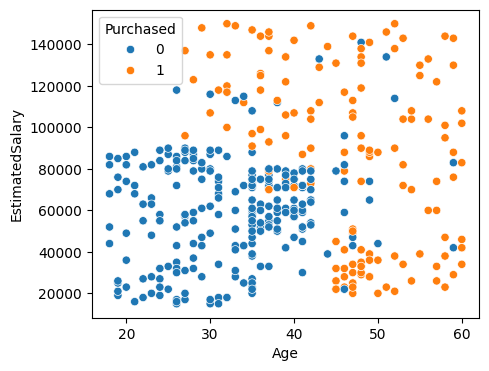

In [4]:
plt.figure(figsize=(5,4))
sns.scatterplot(x ="Age", y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# K-NN Clasification Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier

## Post Pruning

In [33]:
for i in range(1,30):
    knn = KNeighborsClassifier (n_neighbors=i)
    knn.fit(x_train,y_train)
    print(knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100,i)

99.66666666666667 86.0 1
92.33333333333333 85.0 2
92.66666666666666 92.0 3
92.0 91.0 4
91.0 93.0 5
91.33333333333333 92.0 6
91.66666666666666 93.0 7
90.33333333333333 93.0 8
91.0 94.0 9
90.0 93.0 10
91.33333333333333 93.0 11
91.33333333333333 93.0 12
91.66666666666666 93.0 13
90.0 93.0 14
89.66666666666666 93.0 15
89.0 94.0 16
90.66666666666666 94.0 17
90.66666666666666 94.0 18
90.66666666666666 94.0 19
90.33333333333333 93.0 20
90.0 93.0 21
90.0 93.0 22
90.0 93.0 23
89.66666666666666 93.0 24
89.66666666666666 93.0 25
89.66666666666666 93.0 26
90.0 93.0 27
89.66666666666666 93.0 28
89.66666666666666 93.0 29


## K-NN Model

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.score(x_test,y_test)*100

92.0

In [36]:
knn.score(x_train,y_train)*100

92.66666666666666

In [39]:
knn.predict([[-1.781797,-1.490046]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [42]:
knn.predict([[-0.540127,2.356750]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [41]:
x.head(10),y.head(10)

(        Age  EstimatedSalary
 0 -1.781797        -1.490046
 1 -0.253587        -1.460681
 2 -1.113206        -0.785290
 3 -1.017692        -0.374182
 4 -1.781797         0.183751
 5 -1.017692        -0.344817
 6 -1.017692         0.418669
 7 -0.540127         2.356750
 8 -1.208719        -1.078938
 9 -0.253587        -0.139263,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    1
 8    0
 9    0
 Name: Purchased, dtype: int64)

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


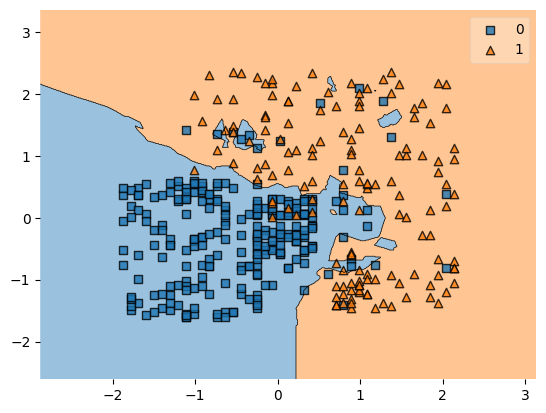

In [44]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = knn)
plt.show()